# ResNet Intel Image Classification
Building a ResNet model on intel image dataset

[Dataset on kaggle](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)

## Contents
* Data Augmentation
* Modeling
* Evaluation
* Prediction

In [2]:
import os
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import  GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
sns.set()

Train Data Generator

In [3]:
train_generator = ImageDataGenerator( 
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=True,
    rescale=1./255,
    shear_range=0.2)

train_data_generator = train_generator.flow_from_directory(
    'data/seg_train/seg_train', 
    batch_size=50, 
    class_mode='categorical', 
    color_mode='rgb',
    target_size=(150, 150))

Found 14034 images belonging to 6 classes.


Test Data Generator

In [4]:
test_generator = ImageDataGenerator( 
    zoom_range=0.2,
    rotation_range=10,
    horizontal_flip=True,
    rescale=1./255,
    shear_range=0.2)

test_data_generator = test_generator.flow_from_directory(
    'data/seg_test/seg_test', 
    batch_size=50, 
    class_mode='categorical', 
    color_mode='rgb',
    target_size=(150, 150))

Found 3000 images belonging to 6 classes.


Show a sample from each class

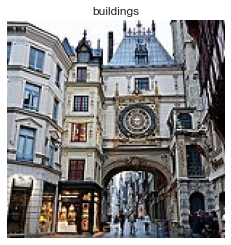

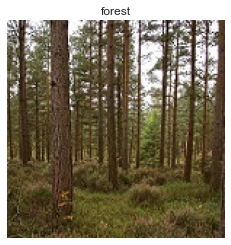

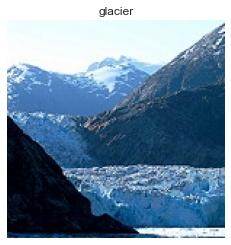

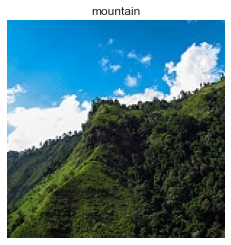

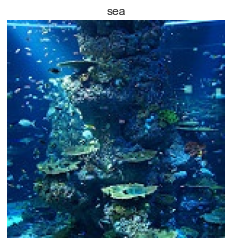

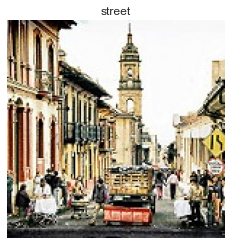

In [5]:
train_path = 'data/seg_train/seg_train'
for name in os.listdir(train_path):
    image_class = os.path.join(train_path, name)
    images = os.listdir(image_class)
    image = cv2.imread(os.path.join(image_class, images[12]))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(name)
    plt.show()

### Modeling
* ResNet50

In [6]:
model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150, 150, 3))

In [7]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 38, 38, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 19, 19, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 512)    2359808     ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [8]:
model_output = model.output
model_input = model.input
model_top = GlobalAveragePooling2D()(model_output)
model_top = Dropout(0.2)(model_top)
out = Dense(6, activation='softmax')(model_top)
Resnet50_model = Model(inputs=model_input, outputs=out)

In [9]:
Resnet50_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint('ResNet50_model.h5', 
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=False, 
                             save_weights_only=False, 
                             mode='auto',
                             save_freq=1)

In [11]:
history = Resnet50_model.fit(train_data_generator, 
                             batch_size=150, 
                             epochs=5, 
                             validation_data=(test_data_generator), 
                             callbacks=[checkpoint])

Epoch 1/5
281/281 [==============================] - 3789s 13s/step - loss: 0.3728 - accuracy: 0.8702 - val_loss: 3.5868 - val_accuracy: 0.1700
Epoch 2/5
281/281 [==============================] - 3727s 13s/step - loss: 0.1955 - accuracy: 0.9293 - val_loss: 1.4597 - val_accuracy: 0.4870
Epoch 3/5
281/281 [==============================] - 3715s 13s/step - loss: 0.1499 - accuracy: 0.9484 - val_loss: 0.4870 - val_accuracy: 0.8487
Epoch 4/5
281/281 [==============================] - 3736s 13s/step - loss: 0.1198 - accuracy: 0.9577 - val_loss: 0.2416 - val_accuracy: 0.9140
Epoch 5/5
281/281 [==============================] - 3690s 13s/step - loss: 0.1035 - accuracy: 0.9630 - val_loss: 0.2477 - val_accuracy: 0.9173


### Evaluation

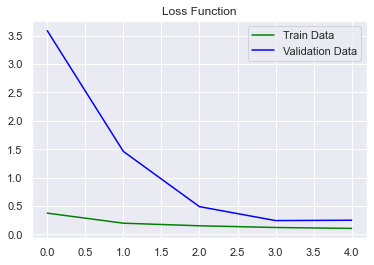

In [12]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')
plt.title('Loss Function')
plt.legend()
plt.show()

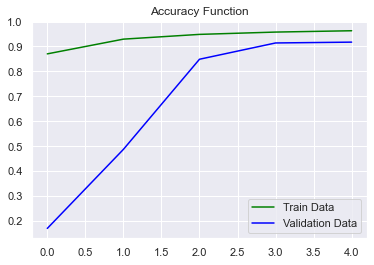

In [14]:
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')
plt.title('Accuracy Function')
plt.legend()
plt.show()

### Prediction

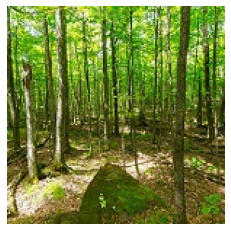

In [19]:
predict_pics = os.listdir('data/seg_pred/seg_pred')
pic = os.path.join('data/seg_pred/seg_pred', predict_pics[16])
img = cv2.imread(pic)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()

In [20]:
ready_img = np.expand_dims(img/255, 0)

In [22]:
result = np.argmax(Resnet50_model.predict(ready_img))
result

1/1 [==============================] - 1s 1s/step


1

In [23]:
def res(x):
    if (x) == 0:
        print('Predict Building')
    elif (x) == 1:
        print('Predict Forest')
    elif (x) == 2:
        print('Predict Glacier')
    elif (x) == 3:
        print('Predict Mountain')
    elif (x) == 4:
        print('Predict Sea')
    else:
        print('Predict Street')

In [24]:
res(result)

Predict Forest
